https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html

## sklearn.feature_extraction.FeatureHasher
This class turns sequences of symbolic feature names (strings) into scipy.sparse matrices, using a hash function to compute the matrix column corresponding to a name. The hash function employed is the signed 32-bit version of `Murmurhash3`

In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import FeatureHasher

### Creating a object of FeatureHasher

In [2]:
hasher_dict = FeatureHasher(n_features=5, input_type='dict')

* `n_features` : Required number of features (columns) in the output matrices.

* `input_type` : string, pair, default “dict”

### Fitting and transforming dictionary 

In [3]:
random_dict = hasher_dict.fit_transform([{'a':1, 'b':2},
                                         {'a':0, 'c':5}])

In [4]:
random_dict

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [5]:
random_dict.shape

(2, 5)

In [6]:
type(random_dict)

scipy.sparse.csr.csr_matrix

### Printing the sparse matrix as numpy array

In [7]:
random_dict.toarray()

array([[ 1., -2.,  0.,  0.,  0.],
       [ 0.,  0., -5.,  0.,  0.]])

* As number of features to be saved in the output is specified is `5` so the number column is `5`

### Instantiating feature hasher to hash `pair` as input

In [8]:
hasher_pair = FeatureHasher(n_features=5, input_type='pair')

### Fitting and transforming pair

In [9]:
random_pair = hasher_pair.fit_transform([[('a', 1), ('b', 2)],
                                        [('a', 0), ('c', 5)]])

In [10]:
random_pair.toarray()

array([[ 1., -2.,  0.,  0.,  0.],
       [ 0.,  0., -5.,  0.,  0.]])

### Feature hasher does not provide inverse transformation

In [11]:
hasher_pair.inverse_transform(random_pair)

AttributeError: 'FeatureHasher' object has no attribute 'inverse_transform'

### Instantiating feature hasher to hash `string` as input

In [12]:
text = ["Where there’s a will, there’s a way",
        "Look before you leap",
        "The early bird catches the worm",
        "Better late than never"]

In [13]:
hasher = FeatureHasher(n_features=8, input_type='string')

### Encoding the text

In [14]:
hashed_features = hasher.fit_transform(text)

In [15]:
print(hashed_features.shape)

(4, 8)


### Printing the sparse matrix as numpy array

In [16]:
hashed_features.toarray()

array([[ 5.,  1.,  1., -3.,  2., -4.,  1.,  4.],
       [ 4.,  0.,  1.,  5.,  1., -1.,  0.,  2.],
       [ 5.,  0.,  2.,  0.,  2., -6.,  1.,  3.],
       [ 3.,  2.,  2., -5., -1., -1., -1.,  5.]])

## Now applying feature hashing on nominal features

### Reading a CSV file

#### It is a atmospheric readings dataset of different days from January to June month
https://github.com/selva86/datasets/blob/master/ozone.csv

In [18]:
ozone_reading = pd.read_csv('datasets/ozone_reading.csv')

ozone_reading.sample(10)

,Month,Day_of_month,ozone_reading,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility
25,February,13,5.80,5700,4,86,53.78,200
81,May,12,33.04,5880,3,80,86.36,40
40,March,10,3.01,5530,5,61,35.60,200
26,February,17,10.60,5770,5,68,55.76,200
77,May,6,2.39,5680,6,77,40.82,120
90,June,8,6.68,5650,6,66,55.40,120
49,March,23,10.18,5710,5,77,60.44,250
1,January,6,5.77,5720,4,69,53.78,60
48,March,22,8.93,5730,4,32,75.74,200
5,January,12,6.39,5720,3,44,63.14,150


### Printing the shape

In [25]:
ozone_reading['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

### Statistical summary

In [26]:
ozone_reading.describe()

,Day_of_month,ozone_reading,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,14.980583,10.254175,5696.796117,5.174757,56.786408,56.254563,137.368932
std,8.465594,7.076096,116.056220,1.997190,18.472370,14.482588,84.619910
min,1.000000,1.800000,5320.000000,0.000000,19.000000,27.500000,2.000000
25%,8.000000,4.815000,5645.000000,4.000000,46.000000,45.680000,75.000000
50%,14.000000,8.680000,5710.000000,5.000000,61.000000,56.300000,120.000000
75%,22.000000,13.530000,5770.000000,6.000000,70.500000,66.020000,200.000000
max,31.000000,33.040000,5890.000000,11.000000,92.000000,89.780000,350.000000


### Correlation matrix

In [27]:
ozone_reading_correlation = ozone_reading.corr()

ozone_reading_correlation

,Day_of_month,ozone_reading,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility
Day_of_month,1.000000,0.203160,0.399783,-0.261894,-0.290985,0.335565,0.017624
ozone_reading,0.203160,1.000000,0.612084,-0.199935,0.301309,0.727284,-0.431484
pressure_height,0.399783,0.612084,1.000000,-0.428993,-0.075138,0.864661,-0.354413
Wind_speed,-0.261894,-0.199935,-0.428993,1.000000,0.156480,-0.354135,0.175619
Humidity,-0.290985,0.301309,-0.075138,0.156480,1.000000,0.013196,-0.300960
Inversion_temperature,0.335565,0.727284,0.864661,-0.354135,0.013196,1.000000,-0.401133
Visibility,0.017624,-0.431484,-0.354413,0.175619,-0.300960,-0.401133,1.000000


### Visualizing correlation matrix

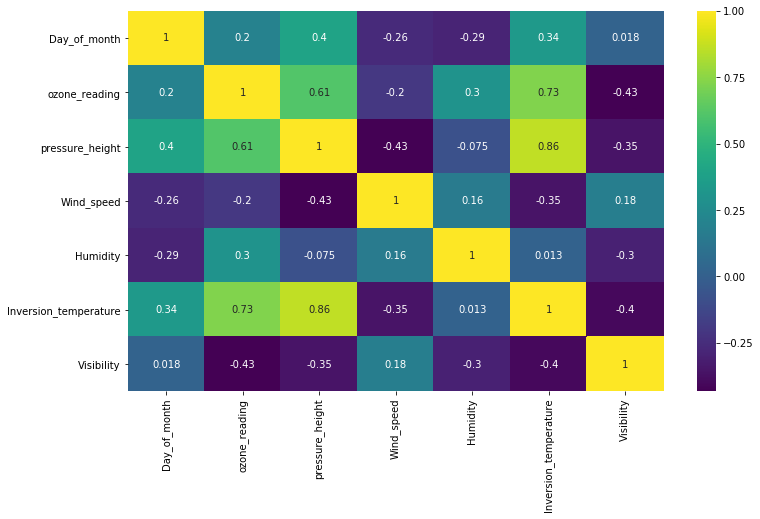

In [28]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.heatmap(ozone_reading_correlation, 
            annot=True, 
            cmap='viridis')

plt.show()

### Creating a object of FeatureHasher

In [29]:
fh = FeatureHasher(n_features=4, input_type='string')

### Fitting and encoding the column

In [30]:
hashed_features = fh.fit_transform(ozone_reading['Month'])

### Printing the matrix as numpy array

In [31]:
hashed_features = hashed_features.toarray()

### The hashed Matrix

In [32]:
hashed_features[:10]

array([[0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.],
       [0., 1., 3., 1.]])

### Making a list to assign name to the hashed columns

In [37]:
hashed_categories = ['month_hash_0', 'month_hash_1', 'month_hash_2', 'month_hash_3']

### Printing the hashed columns along with the column name

In [41]:
hashed_df = pd.DataFrame(hashed_features, 
                         columns = hashed_categories,
                        dtype=np.int)

hashed_df.sample(10)

,month_hash_0,month_hash_1,month_hash_2,month_hash_3
94,0,0,0,2
14,0,1,3,1
29,1,1,1,1
24,1,1,1,1
70,1,0,0,0
42,0,-1,2,0
20,1,1,1,1
86,0,0,0,2
77,0,0,3,0
9,0,1,3,1


### Concating the hashed columns with the dataset

In [42]:
hashed_ozone_reading = pd.concat([ozone_reading, hashed_df], axis=1)

hashed_ozone_reading.sample(10)

,Month,Day_of_month,ozone_reading,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility,month_hash_0,month_hash_1,month_hash_2,month_hash_3
42,March,12,7.63,5690,0,60,59.72,300,0,-1,2,0
40,March,10,3.01,5530,5,61,35.60,200,0,-1,2,0
34,March,1,2.26,5550,10,74,40.10,80,0,-1,2,0
7,January,14,4.35,5780,6,19,56.30,200,0,1,3,1
100,June,22,19.93,5770,5,64,75.56,120,0,0,0,2
30,February,24,6.04,5640,5,68,42.08,300,1,1,1,1
73,April,28,8.68,5650,6,46,37.94,150,1,0,0,0
61,April,9,10.07,5620,7,57,47.66,120,1,0,0,0
78,May,7,11.79,5650,8,66,55.22,140,0,0,3,0
63,April,13,3.65,5440,5,44,32.54,80,1,0,0,0


### Deleting the column `Month` as the hashed format of this column will be used

In [43]:
hashed_ozone_reading.drop(columns=['Month'], inplace=True)

### Spliting the dataset

In [48]:
X = hashed_ozone_reading.drop('ozone_reading', axis=1)
y = hashed_ozone_reading.ozone_reading

In [49]:
X.sample(10)

,Day_of_month,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility,month_hash_0,month_hash_1,month_hash_2,month_hash_3
4,9,5700,3,73,52.52,120,0,1,3,1
84,25,5730,5,71,59.36,200,0,0,3,0
2,7,5790,6,19,54.14,100,0,1,3,1
90,8,5650,6,66,55.40,120,0,0,0,2
35,2,5470,7,46,29.30,300,0,-1,2,0
44,16,5790,2,42,71.06,50,0,-1,2,0
24,12,5680,5,50,45.50,300,1,1,1,1
81,12,5880,3,80,86.36,40,0,0,3,0
69,22,5660,6,58,51.26,120,1,0,0,0
5,12,5720,3,44,63.14,150,0,1,3,1


In [50]:
y.sample(10)

8      3.94
75    21.12
95    26.89
7      4.35
45    24.29
79    19.98
85     4.82
68    17.32
13     4.90
74    18.79
Name: ozone_reading, dtype: float64

### Importing sklearn linear regression model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Creating a object of the `Linear Regression class`

In [51]:
from sklearn.linear_model import LinearRegression

### Creating and training model

In [59]:
linear_model = LinearRegression()

linear_model.fit(X, y)

print('Training score', linear_model.score(X, y))

Training score 0.7115996610285057


In [56]:
linear_model.coef_

array([-0.04483166,  0.01323269,  0.10941852,  0.07175265,  0.32567416,
       -0.00569076,  4.85695496, -3.51166874,  0.10850361,  0.430177  ])

In [57]:
linear_model.intercept_

-88.41800198093256

In [62]:
import statsmodels.api as sm

X_with_constant = sm.add_constant(X)

mod = sm.OLS(y, X_with_constant)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ozone_reading   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     22.70
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           8.83e-21
Time:                        12:19:59   Log-Likelihood:                -283.16
No. Observations:                 103   AIC:                             588.3
Df Residuals:                      92   BIC:                             617.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -88.4180     41.954     -2.108      0.038    -171.742      -5.094
Day_of_month             -0.0448      0.058     -0.778      0.439      -0.159       0.070
pressure_height           0.0132      0.008      1.733      0.086      -0.002       0.028
Wind_speed                0.1094      0.227      0.482      0.631      -0.342       0.561
Humidity                  0.0718      0.025      2.834      0.006       0.021       0.122
Inversion_temperature     0.3257      0.057      5.742      0.000       0.213       0.438
Visibility               -0.0057      0.006     -1.021      0.310      -0.017       0.005
month_hash_0              4.8570      3.478      1.397      0.166      -2.050      11.764
month_hash_1             -3.5117      1.937     -1.813      0.073      -7.359       0.336
month_hash_2              0.1085      1.174      0.092      0.927      -2.223       2.440
month_hash_3              0.4302      1.828      0.235      0.814      -3.200       4.060
==============================================================================
Omnibus:                        3.013   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.416
Skew:                           0.349   Prob(JB):                        0.299
Kurtosis:                       3.277   Cond. No.                     6.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""